<a href="https://colab.research.google.com/github/ibanetz97/Matem-KPI2025/blob/main/IDA_lab3.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import kagglehub
from kagglehub import KaggleDatasetAdapter

path = kagglehub.dataset_download("muratkokludataset/dry-bean-dataset")
print("Dataset downloaded to:", path)

Using Colab cache for faster access to the 'dry-bean-dataset' dataset.
Dataset downloaded to: /kaggle/input/dry-bean-dataset


In [9]:
file_path = os.path.join(path, "Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")
df = pd.read_excel(file_path)

In [10]:
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
# Assuming 'Class' is the target column and others are features
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("First 5 rows of scaled features (X_scaled_df):")
print(X_scaled_df.head())
print("\nMean of X_scaled_df features (should be close to 0):")
print(X_scaled_df.mean().head())
print("\nStandard Deviation of X_scaled_df features (should be close to 1):")
print(X_scaled_df.std().head())

First 5 rows of scaled features (X_scaled_df):
       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.840749  -1.143319        -1.306598        -0.631153     -1.565053   
1 -0.829188  -1.013924        -1.395911        -0.434445     -1.969784   
2 -0.807157  -1.078829        -1.252357        -0.585735     -1.514291   
3 -0.785741  -0.977215        -1.278825        -0.439290     -1.741618   
4 -0.781239  -1.097384        -1.380471        -0.266663     -2.117993   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.185720   -0.841451      -1.063341  0.289087  0.367613   1.423867   
1     -3.686040   -0.826102      -1.044217  0.697477 -0.462907   0.231054   
2     -2.045336   -0.808704      -1.008084  0.578195  0.518417   1.252865   
3     -2.742211   -0.773975      -0.973337  0.671260 -2.241767   0.515049   
4     -4.535028   -0.784286      -0.966080  0.476020  0.804772   1.874992   

   Compactness  ShapeFactor1  ShapeFactor2  S

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10888, 16)
Shape of X_test: (2723, 16)
Shape of y_train: (10888,)
Shape of y_test: (2723,)


In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on y_train and transform both y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)
print("First 5 rows of y_train_one_hot:\n", y_train_one_hot[:5])
print("Number of classes:", y_train_one_hot.shape[1])

Shape of y_train_one_hot: (10888, 7)
Shape of y_test_one_hot: (2723, 7)
First 5 rows of y_train_one_hot:
 [[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
Number of classes: 7


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Get the number of features from X_train
input_dim = X_train.shape[1]
# Get the number of classes from the one-hot encoded y_train
num_classes = y_train_one_hot.shape[1]

# Initialize the Sequential model
model = Sequential()

# Add the input layer (and first hidden layer)
model.add(Dense(64, input_shape=(input_dim,), activation='relu'))

# Add a second hidden layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))

# Print the model summary to display the architecture
print("Neural Network Model Summary:")
model.summary()

Neural Network Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,399 (13.28 KB)

 Trainable params: 3,399 (13.28 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model compiled successfully with Adam optimizer, categorical_crossentropy loss, and accuracy metric.")

Model compiled successfully with Adam optimizer, categorical_crossentropy loss, and accuracy metric.


In [15]:
history = model.fit(
    X_train,
    y_train_one_hot,
    epochs=50,  # Number of training epochs
    batch_size=32, # Batch size for training
    validation_data=(X_test, y_test_one_hot), # Validation data
    verbose=1  # Show training progress
)

print("Model training complete.")

Epoch 1/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6679 - loss: 0.9617 - val_accuracy: 0.9122 - val_loss: 0.2522
Epoch 2/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9172 - loss: 0.2368 - val_accuracy: 0.9210 - val_loss: 0.2150
Epoch 3/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9194 - loss: 0.2150 - val_accuracy: 0.9240 - val_loss: 0.2058
Epoch 4/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.1977 - val_accuracy: 0.9258 - val_loss: 0.2042
Epoch 5/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9263 - loss: 0.1973 - val_accuracy: 0.9288 - val_loss: 0.2001
Epoch 6/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9258 - loss: 0.1970 - val_accuracy: 0.9321 - val_loss: 0.1977
Epoch 7/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9300 - loss: 0.1847 - val_accuracy: 0.9269 - val_loss: 0.1969
Epoch 8/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9237 - loss: 0.2034 - val_accuracy: 0.

In [16]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the test data
y_pred_one_hot = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_one_hot, axis=1)

# Inverse transform the encoded predictions and actual test labels to get original class names
y_test_class_names = label_encoder.inverse_transform(y_test_encoded)
y_pred_class_names = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test_class_names, y_pred_class_names))

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.93      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.95      0.94      0.94       317
    DERMASON       0.91      0.93      0.92       671
       HOROZ       0.97      0.96      0.97       408
       SEKER       0.97      0.94      0.96       413
        SIRA       0.88      0.89      0.89       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [17]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd # Ensure pandas is imported if not already

# Set the path to the file you'd like to load (this might need adjustment based on dataset structure)
# For image datasets from KaggleHub, typically you download the dataset and then access files within the downloaded directory.
# Let's assume the dataset structure for now and adjust if needed after initial download.

# The dataset_download function returns the path to the downloaded dataset. We will then list its contents.
path = kagglehub.dataset_download("gpiosenka/70-dog-breedsimage-data-set")
print("Dataset downloaded to:", path)

# For image datasets, 'load_dataset' with PANDAS adapter might not directly give image dataframes.
# We will need to inspect the downloaded path for image files.
# Let's list the contents of the downloaded directory to find the image files.
import os

print("\nContents of the downloaded directory:")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))


Показано результат, скорочений до останніх рядків (5000).
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/115.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/080.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/062.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/118.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/067.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/106.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/113.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/006.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/066.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/011.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/120.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/002.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/036.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/069.jpg
/kaggle/input/70-dog-breedsimage

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define paths for training, validation, and test directories
train_dir = os.path.join(path, 'train')
valid_dir = os.path.join(path, 'valid') # Assuming a 'valid' directory exists as per instructions
test_dir = os.path.join(path, 'test')   # Assuming a 'test' directory exists as per instructions

# Initialize ImageDataGenerator for training set with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Initialize ImageDataGenerator for validation and test sets (only rescaling)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Create validation data generator
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Create test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Do not shuffle test data for consistent evaluation
)

# Store class names
class_names = list(train_generator.class_indices.keys())

print("Data generators created successfully.")
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", valid_generator.samples)
print("Number of test samples:", test_generator.samples)
print("Class names:", class_names)

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Data generators created successfully.
Number of training samples: 7946
Number of validation samples: 700
Number of test samples: 700
Class names: ['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless', 'American Spaniel', 'Basenji', 'Basset', 'Beagle', 'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim', 'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi', 'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier', 'Bulldog', 'Cairn', 'Chihuahua', 'Chinese Crested', 'Chow', 'Clumber', 'Cockapoo', 'Cocker', 'Collie', 'Corgi', 'Coyote', 'Dalmation', 'Dhole', 'Dingo', 'Doberman', 'Elk Hound', 'French Bulldog', 'German Sheperd', 'Golden Retriever', 'Great Dane', 'Great Perenees', 'Greyhound', 'Groenendael', 'Irish Spaniel', 'Irish Wolfhound', 'Japanese Spaniel', 'Komondor', 'Labradoodle', 'Labrador', 'Lhasa', 'Malinois', 'Maltese', 'Mex Hairless', 'Newf

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Get input shape from the image generator (target_size + color channels)
input_shape = (train_generator.target_size[0], train_generator.target_size[1], 3)
num_classes = train_generator.num_classes

# Initialize the Sequential model
model_cnn = Sequential()

# First Convolutional Block
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(MaxPooling2D((2, 2)))

# Second Convolutional Block
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))

# Third Convolutional Block
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))

# Flatten the output for the fully connected layers
model_cnn.add(Flatten())

# Fully Connected Layers
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(num_classes, activation='softmax'))

# Print the model summary
print("CNN Model Summary:")
model_cnn.summary()

CNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 70)             │         9,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,177,990 (42.64 MB)

 Trainable params: 11,177,990 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

Model compiled successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
249/249 ━━━━━━━━━━━━━━━━━━━━ 976s 4s/step - accuracy: 0.0194 - loss: 4.3039 - val_accuracy: 0.0829 - val_loss: 3.8293
Epoch 2/4
249/249 ━━━━━━━━━━━━━━━━━━━━ 972s 4s/step - accuracy: 0.1031 - loss: 3.6729 - val_accuracy: 0.1486 - val_loss: 3.4275
Epoch 3/4
249/249 ━━━━━━━━━━━━━━━━━━━━ 981s 4s/step - accuracy: 0.1788 - loss: 3.2864 - val_accuracy: 0.2014 - val_loss: 3.1730
Epoch 4/4
249/249 ━━━━━━━━━━━━━━━━━━━━ 977s 4s/step - accuracy: 0.2179 - loss: 3.0861 - val_accuracy: 0.2100 - val_loss: 3.0575
CNN Model training complete.

Evaluating CNN model on the test set...
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 975ms/step - accuracy: 0.2401 - loss: 3.0122
Test Loss: 2.9742
Test Accuracy: 0.2414


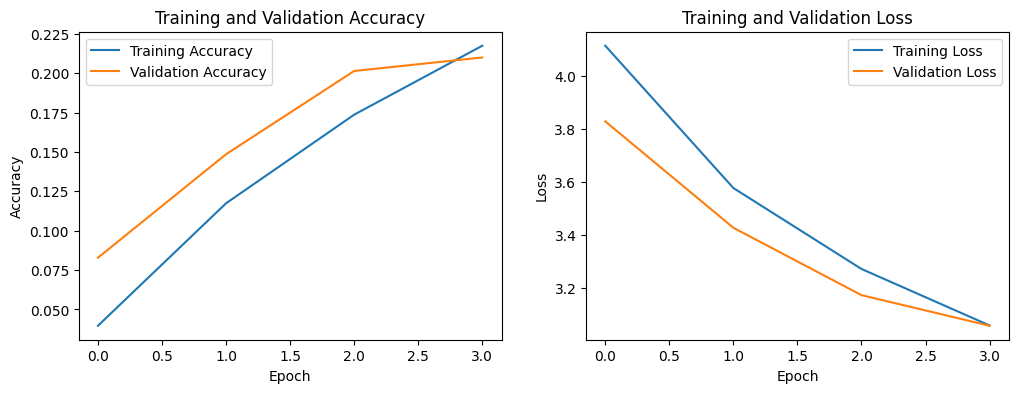

In [20]:
import matplotlib.pyplot as plt

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled successfully.")

# Train the model
history_cnn = model_cnn.fit(
    train_generator,
    epochs=4, # Using 15 epochs for training
    validation_data=valid_generator,
    verbose=1
)

print("CNN Model training complete.")

# Evaluate the model on the test set
print("\nEvaluating CNN model on the test set...")
loss_cnn, accuracy_cnn = model_cnn.evaluate(test_generator, verbose=1)

print(f"Test Loss: {loss_cnn:.4f}")
print(f"Test Accuracy: {accuracy_cnn:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [21]:
from tensorflow.keras.applications import MobileNetV2

# Instantiate MobileNetV2 as base_model
# Use pre-trained ImageNet weights
# Exclude the top classification layer (include_top=False)
# Set input_shape to (224, 224, 3) to match our image generator's target_size
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

print("MobileNetV2 base model loaded and layers frozen successfully.")
print("Base model summary:")
base_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MobileNetV2 base model loaded and layers frozen successfully.
Base model summary:


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Add a Global Average Pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a dense layer for classification
x = Dense(256, activation='relu')(x) # Hidden dense layer

# Add the output layer with num_classes units and softmax activation
predictions = Dense(num_classes, activation='softmax')(x)

# Create the new model by combining the base model and the new classification head
model_mobilenet = Model(inputs=base_model.input, outputs=predictions)

print("Custom classification head added to MobileNetV2 model successfully.")
print("New model summary:")
model_mobilenet.summary()

Custom classification head added to MobileNetV2 model successfully.
New model summary:


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,603,910 (9.93 MB)

 Trainable params: 345,926 (1.32 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [23]:
from tensorflow.keras.optimizers import Adam

# Compile the model
# Since only the custom head layers are trainable, the optimizer will only update their weights
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
print("MobileNetV2 model with custom head compiled successfully.")

# Train the model (only the top layers are being trained as the base is frozen)
history_mobilenet = model_mobilenet.fit(
    train_generator,
    epochs=10,  # Train for a few epochs initially
    validation_data=valid_generator,
    verbose=1
)

print("MobileNetV2 custom head training complete.")

# Evaluate the model on the test set
print("\nEvaluating MobileNetV2 model with custom head on the test set...")
loss_mobilenet, accuracy_mobilenet = model_mobilenet.evaluate(test_generator, verbose=1)

print(f"Test Loss (MobileNetV2): {loss_mobilenet:.4f}")
print(f"Test Accuracy (MobileNetV2): {accuracy_mobilenet:.4f}")

MobileNetV2 model with custom head compiled successfully.
Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 461s 2s/step - accuracy: 0.2605 - loss: 3.4942 - val_accuracy: 0.8357 - val_loss: 1.0923
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.8198 - loss: 0.8916 - val_accuracy: 0.9000 - val_loss: 0.5846
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.8789 - loss: 0.5025 - val_accuracy: 0.9143 - val_loss: 0.5084
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.8986 - loss: 0.3929 - val_accuracy: 0.9114 - val_loss: 0.4823
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 451s 2s/step - accuracy: 0.9079 - loss: 0.3340 - val_accuracy: 0.9171 - val_loss: 0.4718
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.9224 - loss: 0.2857 - val_accuracy: 0.9157 - val_loss: 0.4770
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 456s 2s/step - accuracy: 0.9224 - loss: 0.2732 - val_accuracy: 0.9143 - val_loss: 0.4759
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━

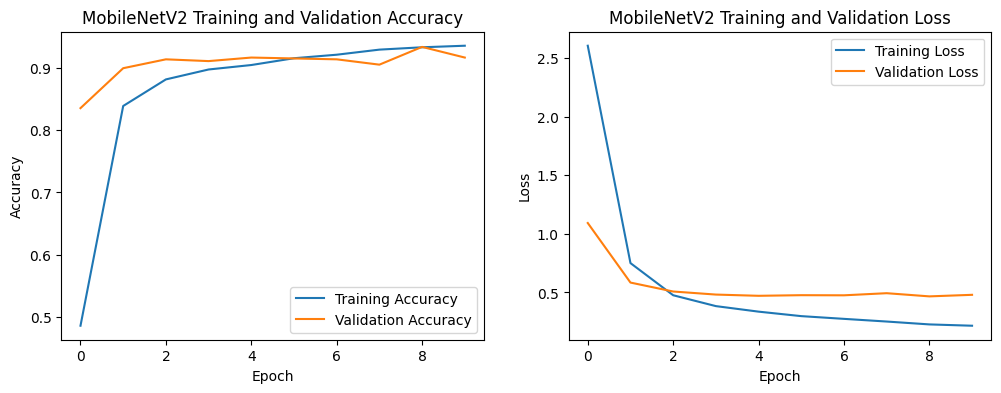

MobileNetV2 training history plots displayed.


In [24]:
import matplotlib.pyplot as plt

# Plot training history for MobileNetV2 model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Training Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

print("MobileNetV2 training history plots displayed.")

In [25]:
import tensorflow as tf

# Unfreeze the last few layers of the base model for fine-tuning
# We'll unfreeze the last 30 layers as an example. You can adjust this number.
for layer in base_model.layers[-30:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False # Keep BatchNormalization layers frozen

print("Last 30 layers of MobileNetV2 base model unfrozen for fine-tuning (excluding BatchNormalization layers).")

# Verify that layers are trainable
print("\nTrainable layers in base_model after unfreezing:")
for layer in base_model.layers:
    if layer.trainable:
        print(layer.name)


Last 30 layers of MobileNetV2 base model unfrozen for fine-tuning (excluding BatchNormalization layers).

Trainable layers in base_model after unfreezing:
block_14_expand
block_14_expand_relu
block_14_depthwise
block_14_depthwise_relu
block_14_project
block_14_add
block_15_expand
block_15_expand_relu
block_15_depthwise
block_15_depthwise_relu
block_15_project
block_15_add
block_16_expand
block_16_expand_relu
block_16_depthwise
block_16_depthwise_relu
block_16_project
Conv_1
out_relu


In [26]:
from tensorflow.keras.optimizers import Adam

# Recompile the model with a lower learning rate for fine-tuning
# It's crucial to recompile the model after unfreezing layers
model_mobilenet.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
print("MobileNetV2 model recompiled with a lower learning rate for fine-tuning.")

# Continue training the model for a few more epochs
# You can store this in a new history object or extend the previous one if needed
history_mobilenet_fine_tune = model_mobilenet.fit(
    train_generator,
    epochs=5,  # Continue training for a few more epochs
    validation_data=valid_generator,
    verbose=1
)

print("MobileNetV2 fine-tuning complete.")

# Evaluate the fine-tuned model on the test set
print("\nEvaluating fine-tuned MobileNetV2 model on the test set...")
loss_mobilenet_fine_tune, accuracy_mobilenet_fine_tune = model_mobilenet.evaluate(test_generator, verbose=1)

print(f"Test Loss (Fine-tuned MobileNetV2): {loss_mobilenet_fine_tune:.4f}")
print(f"Test Accuracy (Fine-tuned MobileNetV2): {accuracy_mobilenet_fine_tune:.4f}")

MobileNetV2 model recompiled with a lower learning rate for fine-tuning.
Epoch 1/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 570s 2s/step - accuracy: 0.9414 - loss: 0.1839 - val_accuracy: 0.9200 - val_loss: 0.5528
Epoch 2/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 533s 2s/step - accuracy: 0.9488 - loss: 0.1555 - val_accuracy: 0.9229 - val_loss: 0.5707
Epoch 3/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - accuracy: 0.9558 - loss: 0.1357 - val_accuracy: 0.9243 - val_loss: 0.5750
Epoch 4/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 538s 2s/step - accuracy: 0.9579 - loss: 0.1257 - val_accuracy: 0.9214 - val_loss: 0.5873
Epoch 5/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 532s 2s/step - accuracy: 0.9637 - loss: 0.1124 - val_accuracy: 0.9271 - val_loss: 0.6016
MobileNetV2 fine-tuning complete.

Evaluating fine-tuned MobileNetV2 model on the test set...
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9639 - loss: 0.1346
Test Loss (Fine-tuned MobileNetV2): 0.1279
Test Accuracy (Fine-tuned MobileNetV2): 0.9600
